# Initialisation

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from sklearn.linear_model import LinearRegression

<img src="./img/fig2.jpg" alt="Drawing" style="width: 300px;"/>

# Import data

In [38]:
# df = pd.read_csv("data/data_MRU.csv",sep = ';')
df = pd.read_excel("./fichiers_input/Exemple_01_cinematique_MRU_data.xlsx")
df

,t,x
0,0.05,2.00
1,0.10,4.05
2,0.15,6.20
3,0.20,8.10
4,0.25,10.20
5,0.30,12.20
6,0.35,14.20
7,0.40,16.30
8,0.45,18.30
9,0.50,20.35


In [52]:
print('yo')

yo


In [39]:
df.columns

Index(['t', 'x'], dtype='object')

In [40]:
df.dtypes

t    float64
x    float64
dtype: object

In [41]:
xdata = list(df["t"])
ydata = list(df["x"])
xdata

[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65]

# Graphique 

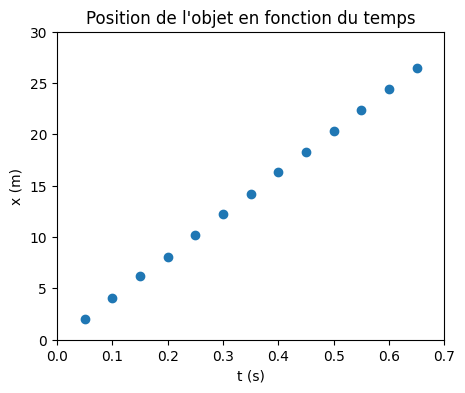

In [42]:
# Création de l'objet graphique:
fig, ax = plt.subplots()

# Nuage de point:
ax.scatter(xdata, ydata)

# Titre:
ax.set_title("Position de l'objet en fonction du temps")

# Nom des axes:
ax.set_xlabel("t (s)")
ax.set_ylabel("x (m)")

# Domaine:
ax.set(xlim=(0, 0.7), ylim=(0, 30))

# Dimension de l'image:
width = 5
height = 4
fig.set_size_inches(width, height)

plt.savefig('graph1.pdf')
plt.show()

# Régression Linéaire

In [43]:
x = np.array(xdata).reshape((-1, 1))
y = np.array(ydata)

model = LinearRegression().fit(x,y)

a = model.coef_[0]
b = model.intercept_
r_sq = model.score(x, y)

print(f"pente: {a}")
print(f"ordonnée à l'origine: {b}")
print(f"coefficient of détermination R^2: {r_sq}")

pente: 40.692307692307686
ordonnée à l'origine: 3.552713678800501e-15
coefficient of détermination R^2: 0.999978559712986


# Analyse des pentes extrêmes

In [44]:
def fct_delta_a(a, b, x1, x2, delta_x1, delta_x2, delta_y1, delta_y2):
    y1 = a*x1+b
    y2 = a*x2+b
    return abs(a)*((delta_y2+delta_y1)/abs(y2-y1)+(delta_x2+delta_x1)/abs(x2-x1))
 
def fct_delta_b(a, delta_a, x1, delta_x1, delta_y1):
    return delta_y1 + abs(x1)*delta_a + abs(a)*delta_x1

In [46]:
x1, x2 = 0.05, 0.65
y1, y2 = a*x1+b, a*x2+b
delta_x1, delta_x2 = .01, .01,
delta_y1, delta_y2 = .5, .5

delta_a = fct_delta_a(a, b, x1, x2, delta_x1, delta_x2, delta_y1, delta_y2)
delta_b = fct_delta_b(a, delta_a, x1, delta_x1, delta_y1)

print(f"delta_a: {delta_a}")
print(f"delta_b: {delta_b}")

delta_a: 3.023076923076923
delta_b: 1.0580769230769231


# Graphique avec régression linéaire

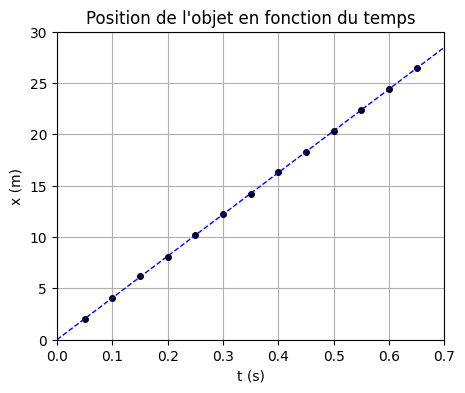

In [47]:
# Création de l'objet graphique:
fig, ax = plt.subplots()

plt.grid()

# Data:
ax.plot(xdata, ydata, 'o', color='black', markersize=4)

#Modele:
xmin, xmax = 0, 0.7
ax.plot([xmin, xmax], [a*xmin+b, a*xmax+b], 'b--', linewidth=1)

# Titre:
ax.set_title("Position de l'objet en fonction du temps")

# Nom des axes:
ax.set_xlabel("t (s)")
ax.set_ylabel("x (m)")

# Domaine:
ax.set(xlim=(0, 0.7), ylim=(0, 30))

# Dimension de l'image:
width = 5
height = 4
fig.set_size_inches(width, height)


plt.savefig('./fichiers_output/Exemple_01_cinematique_MRU_graphique_1.pdf')
plt.show()

# Graphique avec régression linéaire et pentes extrêmes 

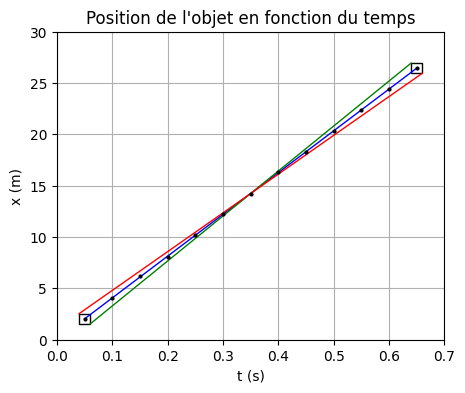

In [48]:
# Création de l'objet graphique:
fig, ax = plt.subplots()

plt.grid()

# Nuage de point:
ax.plot([x1, x2], [y1, y2], 'b-', linewidth=1)
ax.plot([x1 + delta_x1, x2 - delta_x2], [y1 - delta_y1, y2 + delta_y2], 'g-', linewidth=1)
ax.plot([x1 - delta_x1, x2 + delta_x2], [y1 + delta_y1, y2 - delta_y2], 'r-', linewidth=1)
ax.plot(xdata, ydata, 'o', color='black', markersize=2)


ax.add_patch(Rectangle((x1 - delta_x1, y1 - delta_y1), 2*delta_x1, 2*delta_y1,
             edgecolor = 'black',
             fill=False,
             lw=1))
ax.add_patch(Rectangle((x2 - delta_x2, y2 - delta_y2), 2*delta_x2, 2*delta_y2,
             edgecolor = 'black',
             fill=False,
             lw=1))

# Titre:
ax.set_title("Position de l'objet en fonction du temps")

# Nom des axes:
ax.set_xlabel("t (s)")
ax.set_ylabel("x (m)")

# Domaine:
ax.set(xlim=(0, 0.7), ylim=(0, 30))

# Dimension de l'image:
width = 5
height = 4
fig.set_size_inches(width, height)


plt.savefig('./fichiers_output/Exemple_01_cinematique_MRU_graphique_2.pdf')
plt.show()

# Graphique de comparaison

In [49]:
aref = 40 
delta_aref = 1

agraph = a
delta_agraph = delta_a

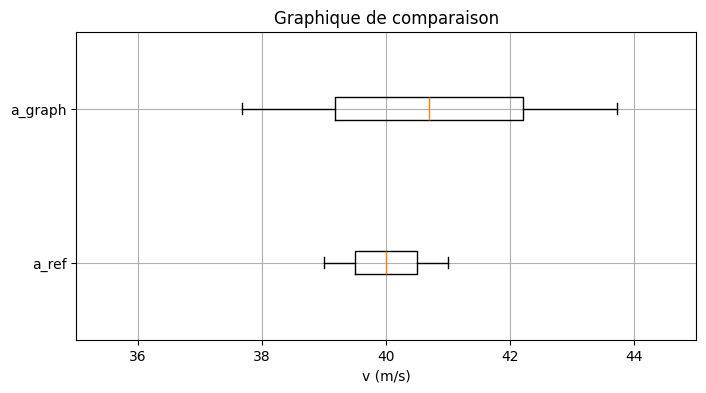

In [50]:
fig, ax = plt.subplots()
plt.grid()
ax.set_title('Graphique de comparaison')

data = np.array([[aref - delta_aref, agraph - delta_agraph],[aref + delta_aref, agraph + delta_agraph]])
ax.boxplot(data, showfliers=False, vert=False, labels = ["a_ref","a_graph"])

ax.set_xlabel("v (m/s)")


width = 8
height = 4
fig.set_size_inches(width, height)


ax.set(xlim=(35, 45))

plt.savefig('./fichiers_output/Exemple_01_cinematique_MRU_graphique_comparaison.pdf')